## Deep Learning
Any system that employs many layers to learn high-level representations of the input data is also a form of deep learning
### Structured Data
- Structured data also called tabular arranged in rows and columns.
### Un-Structured Data
- Unstructured data refers to any data that is not naturally arranged into columns of features, such as images, audio, and text.
- unstructured data is hard to process with traditional models, such as logistic regression or random forest, because the individual pixels or characters are not informative by themselves. They depend on their spatial location and context to form meaningful patterns.
- deep learning can overcome this challenge by using artificial neural networks, which are composed of multiple layers of processing units that can learn how to extract and combine features from the data.

## Neural Network in a nut shell
1. A neural network is composed of stacked layers with units connected through weights.
2. The most common layer type is the fully connected (or dense) layer, where each unit is connected to every unit in the previous layer.
3. Neural networks with fully connected adjacent layers are called multilayer perceptrons (MLPs), and the layers between input and output called hidden layers.
4. In a neural network, the input is transformed through each layer in a forward pass until it reaches the output layer.
5. Each unit applies a nonlinear transformation to a weighted sum of its inputs and passes the output to the next layer.
6. The output layer provides the final probability that the input belongs to a specific category.
7. The goal is to find the set of weights for each layer that leads to accurate predictions.
8. Training the network involves passing batches of images through it and comparing the predicted outputs to the ground truth.
9. Backpropagation is used to adjust the weights based on the prediction error, propagating it backward through the network.
10. Neural networks is powerful because of their ability to learn features from the input data, without human guidance (No need of feature engineering like typical machine learning).

## Working with CIPHAR-10 Dataset
The CIFAR-10 dataset consists of 60,000 color images, each measuring 32 × 32 pixels. These images are classified into one of 10 classes.

In [ ]:
import numpy as np
from tensorflow.keras import datasets, utils
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

170498071/170498071 [==============================] - 2s 0us/step


- The CIFAR-10 dataset is loaded using `datasets.cifar10.load_data()`.
- The dataset is divided into training and testing sets, stored in `x_train`, `y_train`, `x_test`, and `y_test`.
- `NUM_CLASSES` is set to 10, representing the number of classes in the dataset.
- The pixel values in x_train and x_test are scaled to lie between 0 and 1 by dividing by 255.0
- The labels in y_train and y_test are one-hot encoded using `utils.to_categorical()`. This transforms the labels from integer format to a binary representation, where each class is represented by a vector with zeros in all elements except the one corresponding to the class label.
- The shapes of the arrays are modified accordingly. - - y_train becomes `[50000, 10]` and y_test becomes `[10000, 10]`, reflecting the one-hot encoding.
- The training image data `(x_train)` is stored as a tensor with a shape of `[50000, 32, 32, 3]`. This indicates that the dataset contains `50,000` images, each sized 32x32 pixels with `3 color channels (red, green, and blue)`.

## Functional API vs Sequential Model
1. A Sequential model is useful for quickly defining a linear stack of layers where one layer follows on directly from the previous layer without any branching.
2. The Functional API can create complex architectures, allowing for multiple inputs and outputs, shared layers, and non-sequential connections between layers. It provides greater control and customization options compared to the Sequential Model.

In [ ]:
#Building MLP using Sequential Mode

from tensorflow.keras import layers, models
model = models.Sequential([
 layers.Flatten(input_shape=(32, 32, 3)),
 layers.Dense(200, activation = 'relu'),
 layers.Dense(150, activation = 'relu'),
 layers.Dense(10, activation = 'softmax'),
])

In [ ]:
#Using Functional API

from tensorflow.keras import layers, models
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

- *The Functional API is highly suitable for Generative AI as it provides the flexibility and control needed to design complex and customized model architectures, enabling the creation of advanced generative models with diverse inputs/outputs, shared layers, skip connections, and other intricate features*

## Layers in Neural Networks

The MLP (Multilayer Perceptron) model consists of three types of layers: Input, Flatten, and Dense.
1. The Input layer serves as the entry point of the network, and the shape of each data element is specified.
2.The Flatten layer is used to convert the input into a vector, making it flat and suitable for the subsequent Dense layer.
3. Dense layer consists of units that are densely connected to the previous layer, with each connection having a weight.

## Activation functions
Activation functions are essential tools in neural networks that enable them to learn and make predictions effectively by introducing non-linearities, controlling information flow, and determining output ranges.

Three important activation functions are ReLU, sigmoid, and softmax.

1. ReLU (rectified linear unit) sets negative inputs to 0 and keeps non-negative inputs unchanged.
2. LeakyReLU is similar to ReLU but returns a small negative value for negative inputs to prevent dead units.
3. Sigmoid scales the output between 0 and 1, suitable for binary or multilabel classification problems.
4. Softmax ensures the sum of outputs equals 1, used for multiclass classification with exclusive classes.

*ReLU, LeakyReLU, and sigmoid are useful for different types of tasks, while softmax is particularly suitable for multiclass classification. (There are other activation functions in the market but they are mostly less use)*
![](https://static.wixstatic.com/media/3eee0b_c027550e5c9249ea9da9a8464c49b194~mv2.png/v1/fill/w_600,h_412,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/3eee0b_c027550e5c9249ea9da9a8464c49b194~mv2.png)


In [ ]:
# A ReLU activation function defined as part of a Dense layer

x = layers.Dense(units=200, activation = 'relu')(x)

In [ ]:
# A ReLU activation function defined as its own layer
x = layers.Dense(units=200)(x)
x = layers.Activation('relu')(x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


The `model.summary()` method displays the network's architecture, layer shapes, and trainable parameters. It provides insights into the input and output shapes of each layer and the total number of parameters in the model. This information helps analyze the network's structure, identify potential optimizations, and assess the complexity of the model.

In [ ]:
# Defining the optimizer and the loss function

from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
 metrics=['accuracy'])

## Loss Function
The loss function is used to compare the predicted output of a neural network to the ground truth.*(the greater this number, the worse the network has performed)*

Three types of Loss functions:

1. Mean squared error (MSE) is used for regression problems, where the output is continuous.

2. Categorical cross-entropy is suitable for classification problems where each observation belongs to only one class.
3. Binary cross-entropy is used for binary classification problems or multi-label problems where an observation can belong to multiple classes simultaneously.

## Optimizers
The optimizer is responsible for updating the weights in the neural network based on the gradient of the loss function. It can be used `compile` keyword.

1. `Adam` is a widely used and stable optimizer, often with default parameters that work well. The learning rate can be adjusted for controlling weight updates.
2. `RMSProp` is another optimizer option, with its parameters having specific roles.

*The loss function should match the problem type: mean squared error for regression, categorical cross-entropy for single-class classification, and binary cross-entropy for binary or multi-label classification*

In [ ]:
model.fit(x_train
 , y_train
 , batch_size = 32
 , epochs = 10
 , shuffle = True
 )

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8399 - accuracy: 0.3379
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6569 - accuracy: 0.4062
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5859 - accuracy: 0.4346
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5313 - accuracy: 0.4519
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4956 - accuracy: 0.4653
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4637 - accuracy: 0.4770
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4434 - accuracy: 0.4849
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4139 - accuracy: 0.4983
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3987 - accuracy: 0.5027
Epoch 10/10
1563/1563 [==============================] - 20s 13m

- The `fit` method is called to train the model, specifying the input data (`x_train`) and the corresponding labels (`y_train`).

- The `batch_size` determines the number of observations passed to the network in each training step.

- The `epochs` parameter defines the number of times the network will be trained on the full dataset.

- Setting `shuffle = True` randomly selects batches from the training data without replacement at each training step.

*The training process involves initializing the network's weights, performing training steps, and updating the weights based on backpropagation of errors.*

*The batch size affects the stability and speed of gradient calculations, with a recommended range between 32 and 256.*

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4632 - accuracy: 0.4830


[1.4631531238555908, 0.4830000102519989]

The `evaluate` method is used to evaluate the performance of a model on a test set.

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat',
'deer', 'dog'
 , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 6ms/step


In this code snippet, a model's predictions are obtained for a test dataset. The predicted probabilities of each class are stored in the `preds` array. Using `np.argmax()` with `axis=-1`, the highest probability class indices are extracted and mapped to their corresponding labels from the `CLASSES` array, resulting in `preds_single`. Similarly, the actual class labels are extracted from the ground truth labels `y_test` using `np.argmax()` and mapped to their labels in `CLASSES`, resulting in `actual_single`. This allows for easy interpretation and comparison of the model's predictions and the actual class labels.

## Displaying predictions of the MLP against the actual labels

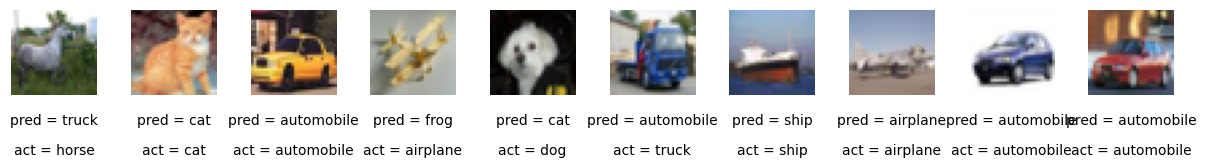

## Convolutional Neural Network (CNN)
- Convolutional Neural Networks (CNNs) are used to capture spatial structure in images.
- Convolutional layers perform convolutions by multiplying filters with image portions and summing the results.
- The output of convolutions highlights features that match the filter and produces larger values for close matches.
- Moving the filter across the entire image generates a new array that captures a specific feature.
- Convolutional layers consist of multiple filters that learn weights to identify interesting features.


## Stride
Padding in CNN refers to the technique of adding extra border pixels to the input image. It helps preserve spatial dimensions and avoid information loss at the edges of the image.

![](https://miro.medium.com/v2/resize:fit:790/1*1okwhewf5KCtIPaFib4XaA.gif)
## Padding
Padding in CNN refers to the technique of adding extra border pixels to the input image. It helps preserve spatial dimensions and avoid information loss at the edges of the image.

## Batch normalization
Batch normalization is a technique that helps deep neural networks train more effectively by keeping the values of the network's weights within a reasonable range. It prevents the problem of exploding gradients, which can cause the network to become unstable during training. By normalizing the values of each mini-batch of data, batch normalization helps ensure that the network's activations stay consistent and leads to better training results.

## Dropout
Dropout is a technique used in neural networks to randomly deactivate some neurons during training, preventing overfitting and promoting better generalization.

## Important questions:
1. What is the purpose of dropout in neural networks and how does it help prevent overfitting?

2. How does batch normalization contribute to effective training in deep neural networks?

3. What is the role of padding in convolutional neural networks (CNNs) and how does it preserve spatial dimensions in images?

4. What are the advantages of using the Functional API over the Sequential model in creating complex and customized neural network architectures?

5. How does the process of backpropagation work in neural networks, and what is its role in training the model?